In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
FOLDER_PATH = '/home/surbhit/Omdena/omdena-mumbai-chapter-air-quality/src/data'

In [3]:
for file in os.listdir(FOLDER_PATH):
    print(file)

KhindipadaBhandupWestMumbaiIITM.csv
KandivaliEastMumbaiMPCB.csv
BorivaliEastMumbaiIITM.csv
BandraMumbaiMPCB.csv
VasaiWestMumbaiMPCB.csv
VileParleWestMumbaiMPCB.csv
README.md
ColabaMumbaiMPCB.csv
WorliMumbaiMPCB.csv
NavyNagarColabaMumbaiIITM.csv
MazgaonMumbaiIITM.csv
SiddharthNagarWorliMumbaiIITM.csv
MaladWestMumbaiIITM.csv
MulundWestMumbaiMPCB.csv
KurlaMumbaiMPCB.csv
ChakalaAndheriEastMumbaiIITM.csv
SionMumbaiMPCB.csv
ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
PowaiMumbaiMPCB.csv
airQuality.csv
BorivaliEastMumbaiMPCB.csv


In [5]:
df = pd.read_csv('../../data/BandraKurlaComplexMumbaiIITM.csv')

In [6]:
df.head()

,Unnamed: 0,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,MP-Xylene,RH,WS,WD,SR,BP,Xylene,AT,RF,TOT-RF
0,1,01-01-2021 00:00,01-01-2021 00:15,147.26,175.93,16.23,61.72,45.3,79.76,4.68,...,None,94.14,0.46,187.53,None,953.2,0,21.84,0,0.0
1,2,01-01-2021 00:15,01-01-2021 00:30,145.37,173.96,16.88,61.5,45.75,79.01,18.49,...,None,94.99,0.47,224.11,None,953.2,0,21.84,0,0.0
2,3,01-01-2021 00:30,01-01-2021 00:45,156.71,186.12,22.71,62.99,51.15,84.96,17.62,...,None,93.88,0.46,212.47,None,953.2,0,22.01,0,0.0
3,4,01-01-2021 00:45,01-01-2021 01:00,171.18,205.41,16.55,59.13,44.19,77.83,18.14,...,None,93.38,0.27,216.65,None,954.2,0,21.99,0,0.0
4,5,01-01-2021 01:00,01-01-2021 01:15,183.17,219.31,20.39,59.87,47.66,81.63,18.69,...,None,92.44,0.17,103.12,None,954.9,0,22.04,0,0.0


In [7]:
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)

In [8]:
df_new = df.copy()

In [9]:
df_new.replace('None',np.nan,inplace=True)

In [10]:
df_new.rename(columns={'From Date':'Start'},inplace=True)

In [11]:
df_new.drop(columns=['To Date'], inplace=True)

**NULL VALUES**

In [12]:
df_new.isnull().sum()

Start              0
PM2.5          21769
PM10           22060
NO             24876
NO2            24336
NOx            24236
NH3            24698
SO2            24429
CO             21873
Ozone          22107
Benzene        19965
Toluene        20050
Eth-Benzene    22646
MP-Xylene      23564
RH             20197
WS             20521
WD             20391
SR             76475
BP             20139
Xylene         20058
AT             33700
RF             20106
TOT-RF             0
dtype: int64

In [13]:
df_new.isnull().sum()/df_new.shape[0]

Start          0.000000
PM2.5          0.284655
PM10           0.288460
NO             0.325283
NO2            0.318222
NOx            0.316914
NH3            0.322955
SO2            0.319438
CO             0.286015
Ozone          0.289075
Benzene        0.261066
Toluene        0.262177
Eth-Benzene    0.296123
MP-Xylene      0.308127
RH             0.264099
WS             0.268336
WD             0.266636
SR             1.000000
BP             0.263341
Xylene         0.262282
AT             0.440667
RF             0.262909
TOT-RF         0.000000
dtype: float64

**SELECTING FEW PARAMETERS FOR INITIAL EXPLORATION**
* PM2.5, PM10, NO, NO2, NOx, NH3, SO2, CO, Ozone

In [14]:
important_features = ['Start', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone']

important_features_df = df_new[important_features]

important_features_df.head()

,Start,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,01-01-2021 00:00,147.26,175.93,16.23,61.72,45.3,79.76,4.68,1.38,13
1,01-01-2021 00:15,145.37,173.96,16.88,61.5,45.75,79.01,18.49,1.38,15
2,01-01-2021 00:30,156.71,186.12,22.71,62.99,51.15,84.96,17.62,1.27,10
3,01-01-2021 00:45,171.18,205.41,16.55,59.13,44.19,77.83,18.14,1.23,12
4,01-01-2021 01:00,183.17,219.31,20.39,59.87,47.66,81.63,18.69,1.24,14


In [15]:
important_features_df.rename(columns={'Start':'Date'},inplace=True)

<ipython-input-15-c230cc0a79f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.rename(columns={'Start':'Date'},inplace=True)


In [16]:
important_features_df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,01-01-2021 00:00,147.26,175.93,16.23,61.72,45.3,79.76,4.68,1.38,13
1,01-01-2021 00:15,145.37,173.96,16.88,61.5,45.75,79.01,18.49,1.38,15
2,01-01-2021 00:30,156.71,186.12,22.71,62.99,51.15,84.96,17.62,1.27,10
3,01-01-2021 00:45,171.18,205.41,16.55,59.13,44.19,77.83,18.14,1.23,12
4,01-01-2021 01:00,183.17,219.31,20.39,59.87,47.66,81.63,18.69,1.24,14


In [17]:
time = pd.DataFrame()
time = important_features_df['Date']

In [18]:
df = pd.DataFrame()

df[['Date','Time']] = important_features_df.Date.str.split(" ",expand=True)
df['Hours'] = df.Time.str.split(':',expand=True)[0]

In [19]:
important_features_df.drop(columns=['Date'],axis=1,inplace=True)

important_features_df.insert(loc=0,column='Date',value=df['Date'])
important_features_df.insert(loc=1,column='Time',value=df['Time'])
important_features_df.insert(loc=1,column='Hours',value=df['Hours'])

<ipython-input-19-26607d18cc19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.drop(columns=['Date'],axis=1,inplace=True)


In [20]:
#Converting nuerical features to float
important_features_df = important_features_df.astype({'Hours':'float','PM2.5': 'float','PM10': 'float','NO': 'float','NO2': 'float','NOx': 'float','NH3': 'float','SO2': 'float','CO': 'float','Ozone': 'float'})

In [21]:
important_features_df.drop(columns=['Time'],inplace=True)

In [22]:
important_features_df.head()

,Date,Hours,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,01-01-2021,0.0,147.26,175.93,16.23,61.72,45.30,79.76,4.68,1.38,13.0
1,01-01-2021,0.0,145.37,173.96,16.88,61.50,45.75,79.01,18.49,1.38,15.0
2,01-01-2021,0.0,156.71,186.12,22.71,62.99,51.15,84.96,17.62,1.27,10.0
3,01-01-2021,0.0,171.18,205.41,16.55,59.13,44.19,77.83,18.14,1.23,12.0
4,01-01-2021,1.0,183.17,219.31,20.39,59.87,47.66,81.63,18.69,1.24,14.0


In [23]:
important_features_df

,Date,Hours,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,01-01-2021,0.0,147.26,175.93,16.23,61.72,45.30,79.76,4.68,1.38,13.0
1,01-01-2021,0.0,145.37,173.96,16.88,61.50,45.75,79.01,18.49,1.38,15.0
2,01-01-2021,0.0,156.71,186.12,22.71,62.99,51.15,84.96,17.62,1.27,10.0
3,01-01-2021,0.0,171.18,205.41,16.55,59.13,44.19,77.83,18.14,1.23,12.0
4,01-01-2021,1.0,183.17,219.31,20.39,59.87,47.66,81.63,18.69,1.24,14.0
...,...,...,...,...,...,...,...,...,...,...,...
76470,08-03-2023,13.0,89.07,187.55,128.94,107.15,163.90,173.35,50.83,0.00,165.0
76471,08-03-2023,13.0,93.35,177.91,96.45,105.15,128.26,148.24,43.74,0.00,150.0
76472,08-03-2023,14.0,95.64,177.82,118.26,158.14,177.40,179.00,40.37,0.00,192.0
76473,08-03-2023,14.0,101.09,175.04,105.69,149.00,163.99,155.00,40.38,0.00,51.0


In [24]:
#Converting to date time format
important_features_df['Date'] = pd.to_datetime(important_features_df.Date, infer_datetime_format = True)

<ipython-input-24-bbcace53d05d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  important_features_df['Date'] = pd.to_datetime(important_features_df.Date, infer_datetime_format = True)


In [25]:
important_features_df.set_index('Date', inplace=True)

In [26]:
important_features_df.head()

,Hours,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
Date,,,,,,,,,,
2021-01-01,0.0,147.26,175.93,16.23,61.72,45.30,79.76,4.68,1.38,13.0
2021-01-01,0.0,145.37,173.96,16.88,61.50,45.75,79.01,18.49,1.38,15.0
2021-01-01,0.0,156.71,186.12,22.71,62.99,51.15,84.96,17.62,1.27,10.0
2021-01-01,0.0,171.18,205.41,16.55,59.13,44.19,77.83,18.14,1.23,12.0
2021-01-01,1.0,183.17,219.31,20.39,59.87,47.66,81.63,18.69,1.24,14.0


**BOXPLOT FOR INDIVIDUAL FEATURES**

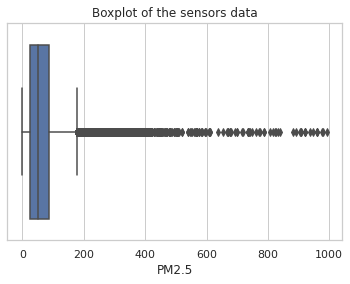

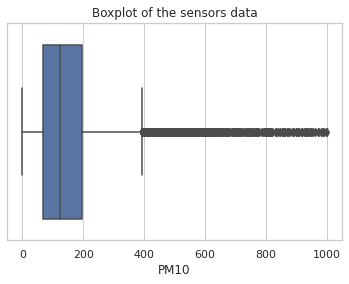

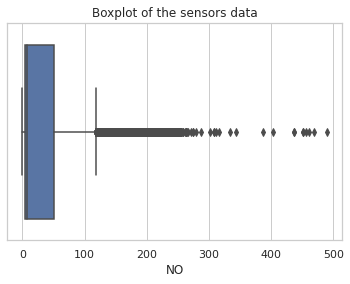

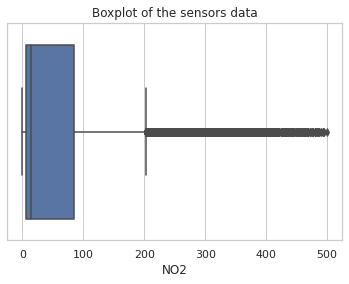

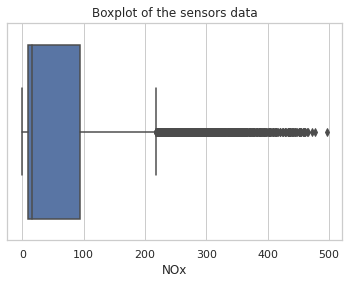

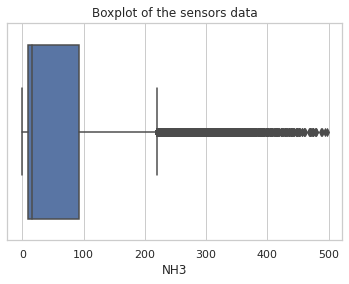

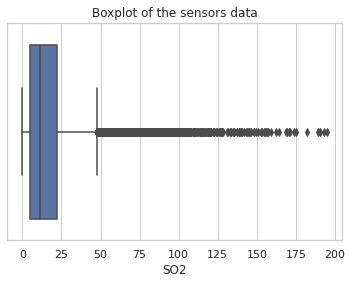

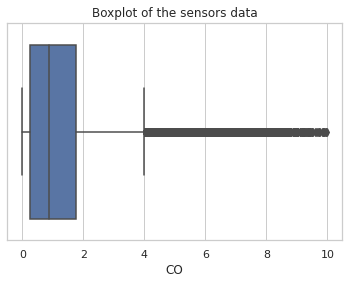

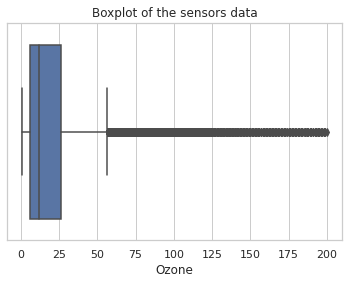

In [27]:
sns.set_theme(style="whitegrid")

for i in important_features_df.columns[1:10]:
    sns.boxplot(x=important_features_df[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

In [28]:
important_features_df.columns[1:10]

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone'], dtype='object')

**CHECKING FOR OUTLIERS USING IQR METHOD AND VISUALIZING THE DATA DISTRIBUTION**

In [29]:
def outlierAndVisualization(data,col):
    print('*'*50)
    print(col)
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    lower_lim = q1 - (q3-q1)*1.5
    upper_lim = q3 + (q3-q1)*1.5
    print('Lower limit: {}'.format(lower_lim))
    print('Upper limit: {}'.format(upper_lim))
    lower_vals = len(data[data[col] < lower_lim])
    upper_vals = len(data[data[col] > upper_lim])
    print('Values less than lower limit and more than upper limit: {}'.format(lower_vals+upper_vals))
    print('%age of above number: {}'.format(round((lower_vals+upper_vals)/len(data[col])*100,2)))
    plt.hist(data[col])
    plt.xlabel(col)
    plt.show()

**************************************************
PM2.5
Lower limit: -64.51000000000002
Upper limit: 177.57000000000002
Values less than lower limit and more than upper limit: 3128
%age of above number: 4.09


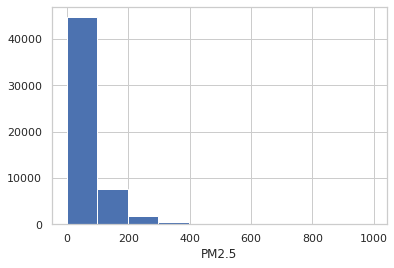

**************************************************
PM10
Lower limit: -128.64999999999995
Upper limit: 391.30999999999995
Values less than lower limit and more than upper limit: 1408
%age of above number: 1.84


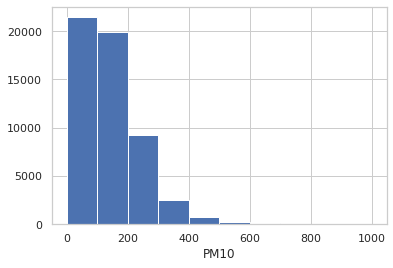

**************************************************
NO
Lower limit: -63.864999999999995
Upper limit: 118.815
Values less than lower limit and more than upper limit: 2734
%age of above number: 3.58


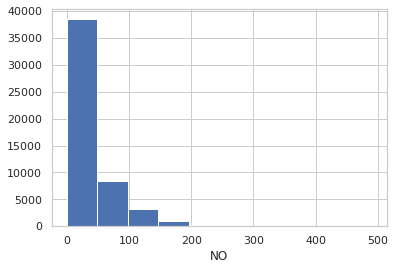

**************************************************
NO2
Lower limit: -112.0875
Upper limit: 202.4125
Values less than lower limit and more than upper limit: 2803
%age of above number: 3.67


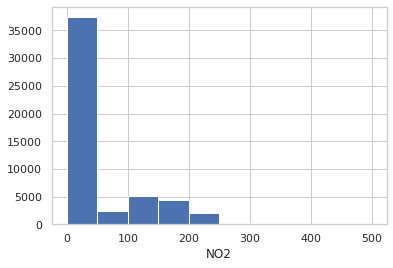

**************************************************
NOx
Lower limit: -115.42999999999998
Upper limit: 218.48999999999998
Values less than lower limit and more than upper limit: 1501
%age of above number: 1.96


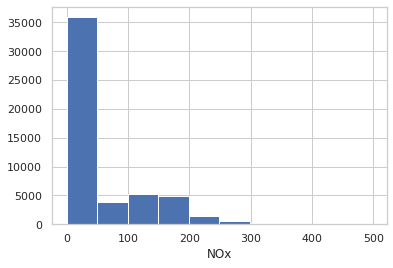

**************************************************
NH3
Lower limit: -117.30000000000001
Upper limit: 219.5
Values less than lower limit and more than upper limit: 3030
%age of above number: 3.96


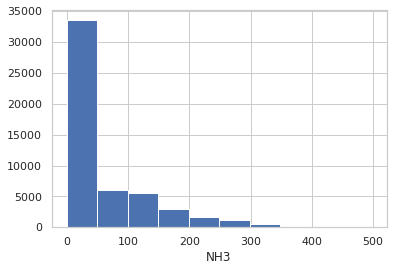

**************************************************
SO2
Lower limit: -20.648750000000007
Upper limit: 47.46125000000001
Values less than lower limit and more than upper limit: 2646
%age of above number: 3.46


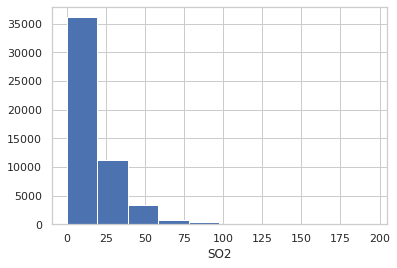

**************************************************
CO
Lower limit: -2.0
Upper limit: 4.0
Values less than lower limit and more than upper limit: 2372
%age of above number: 3.1


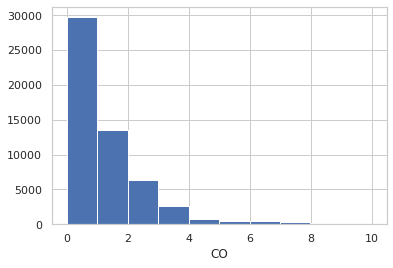

**************************************************
Ozone
Lower limit: -24.0
Upper limit: 56.0
Values less than lower limit and more than upper limit: 3368
%age of above number: 4.4


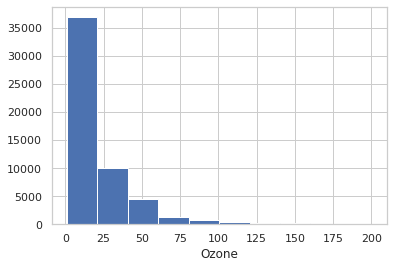

In [30]:
#Performing IQR and distribution visualization on original dataset

for x in important_features_df.columns[1:10]:
    outlierAndVisualization(important_features_df,x)

**USING ITERATIVE IMPUTER TO FILL MISSING VALUES**

* Performing the missing values inputation using Random Forest, bayesian Ridge and KNN Imputer

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [32]:
#Random Forest Imputer
#RF_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=4,max_depth=10,bootstrap=True,max_samples=0.5,n_jobs=2,random_state=0))
#important_features_df_imputed = pd.DataFrame(RF_imputer.fit_transform(important_features_df), columns=important_features_df.columns, index=important_features_df.index)

#Linear Model - bayesian Riger Imputer
#LM_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
#important_features_df_imputed = pd.DataFrame(LM_imputer.fit_transform(important_features_df), columns=important_features_df.columns, index=important_features_df.index)

#KNN imputer
KNN_imputer= KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform')
important_features_df_imputed = pd.DataFrame(KNN_imputer.fit_transform(important_features_df), columns=important_features_df.columns, index=important_features_df.index)


important_features_df_imputed.isnull().sum()

Hours    0
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
SO2      0
CO       0
Ozone    0
dtype: int64

In [33]:
#Performing IQR and distribution visualization on imputed

for x in important_features_df_imputed.columns[1:10]:
    checkOutliers(important_features_df_imputed,x)

NameError: name 'checkOutliers' is not defined

**TO DO**
* Check which imputation method performs accurate
* Do we require any manual imputation based on previous data
* Analyse the dataset for more info on missing values and check for patterns